In [1]:
#data loading
import pandas as pd
filename="/content/TitanicSurvival.csv"
a=pd.read_csv(str(filename))

print(a)

                             rownames survived     sex      age passengerClass
0       Allen, Miss. Elisabeth Walton      yes  female  29.0000            1st
1      Allison, Master. Hudson Trevor      yes    male   0.9167            1st
2        Allison, Miss. Helen Loraine       no  female   2.0000            1st
3     Allison, Mr. Hudson Joshua Crei       no    male  30.0000            1st
4     Allison, Mrs. Hudson J C (Bessi       no  female  25.0000            1st
...                               ...      ...     ...      ...            ...
1304             Zabour, Miss. Hileni       no  female  14.5000            3rd
1305            Zabour, Miss. Thamine       no  female      NaN            3rd
1306        Zakarian, Mr. Mapriededer       no    male  26.5000            3rd
1307              Zakarian, Mr. Ortin       no    male  27.0000            3rd
1308               Zimmerman, Mr. Leo       no    male  29.0000            3rd

[1309 rows x 5 columns]


In [2]:
print(a.head())

                          rownames survived     sex      age passengerClass
0    Allen, Miss. Elisabeth Walton      yes  female  29.0000            1st
1   Allison, Master. Hudson Trevor      yes    male   0.9167            1st
2     Allison, Miss. Helen Loraine       no  female   2.0000            1st
3  Allison, Mr. Hudson Joshua Crei       no    male  30.0000            1st
4  Allison, Mrs. Hudson J C (Bessi       no  female  25.0000            1st


In [3]:
print(a.tail())

                       rownames survived     sex   age passengerClass
1304       Zabour, Miss. Hileni       no  female  14.5            3rd
1305      Zabour, Miss. Thamine       no  female   NaN            3rd
1306  Zakarian, Mr. Mapriededer       no    male  26.5            3rd
1307        Zakarian, Mr. Ortin       no    male  27.0            3rd
1308         Zimmerman, Mr. Leo       no    male  29.0            3rd


In [4]:
##Checking for null values
a.isna().sum()

,0
rownames,0
survived,0
sex,0
age,263
passengerClass,0


In [5]:
a["age"] = a["age"].fillna(a["age"].mean())

In [6]:
from sklearn.preprocessing import LabelEncoder

b=LabelEncoder()


#transform string into int
transformColumns={0,1,2,4}
for x in transformColumns:
  a[a.columns[x]]=b.fit_transform(a[a.columns[x]])


print(a)

      rownames  survived  sex        age  passengerClass
0           21         1    0  29.000000               0
1           23         1    1   0.916700               0
2           24         0    0   2.000000               0
3           25         0    1  30.000000               0
4           26         0    0  25.000000               0
...        ...       ...  ...        ...             ...
1304      1293         0    0  14.500000               2
1305      1294         0    0  29.881135               2
1306      1295         0    1  26.500000               2
1307      1296         0    1  27.000000               2
1308      1297         0    1  29.000000               2

[1309 rows x 5 columns]


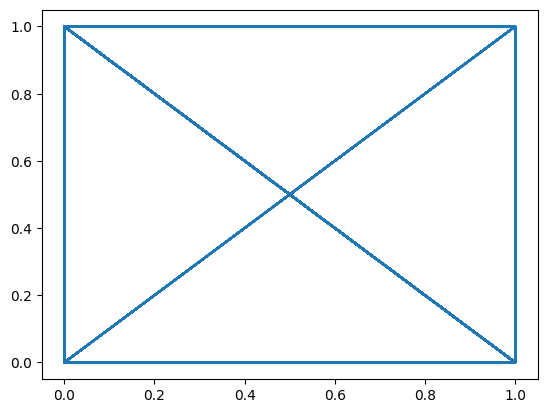

In [8]:
from matplotlib import pyplot as plt
target="survived"
index=2
plt.plot(a[a.columns[index]],a[str(target)])

<BarContainer object of 1309 artists>

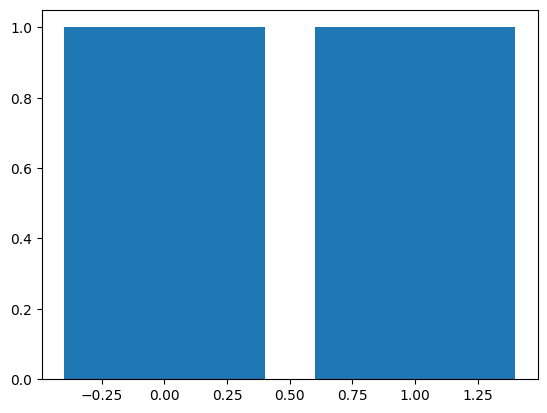

In [9]:
plt.bar(a[a.columns[2]],a[str(target)])

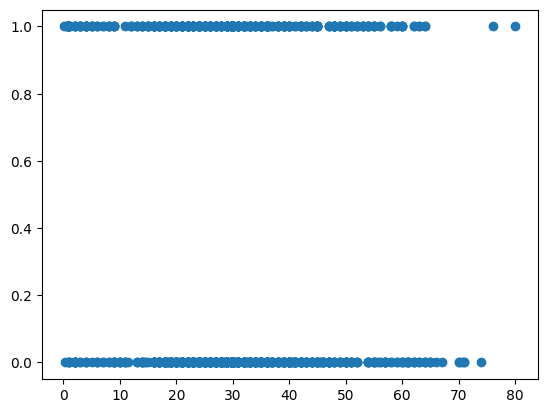

In [10]:
plt.scatter(a[a.columns[3]], a[str(target)])

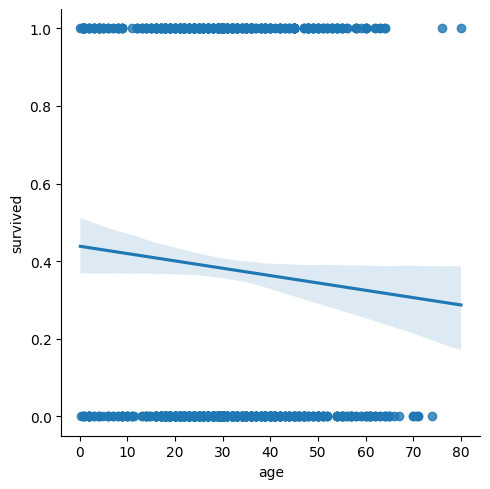

In [12]:
import seaborn as sns
#a["education"] = pd.to_numeric(a["education"])
#a["parttime"] = pd.to_numeric(a["parttime"])
sns.lmplot(x="age",y=str(target),data=a)

<Axes: xlabel='age', ylabel='survived'>

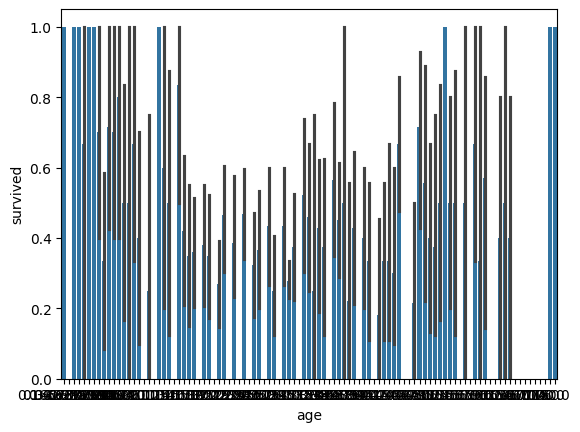

In [14]:
sns.barplot(x=a.columns[3],y=str(target),data=a)

<Axes: xlabel='sex', ylabel='survived'>

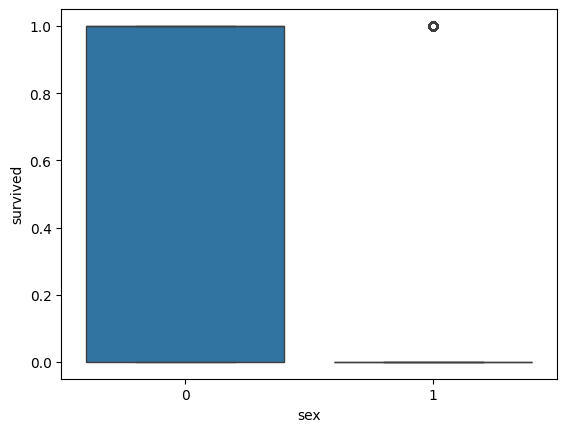

In [16]:
sns.boxplot(x=a.columns[2],y=str(target),data=a)

<ipython-input-17-61a72522baee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='survived', ylabel='Density'>

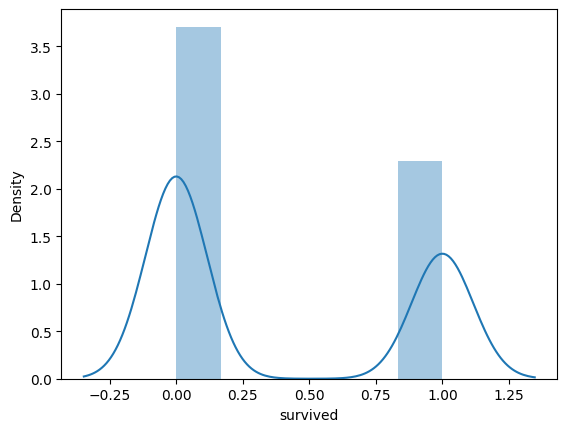

In [17]:
sns.distplot(a[str(target)])

<Axes: xlabel='sex', ylabel='Density'>

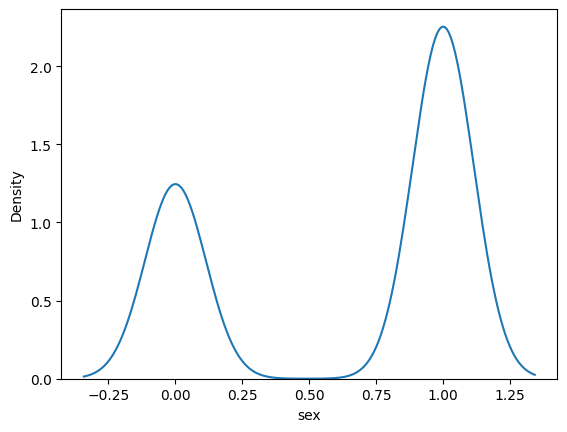

In [19]:
sns.kdeplot(a[a.columns[2]])

<Axes: xlabel='age', ylabel='count'>

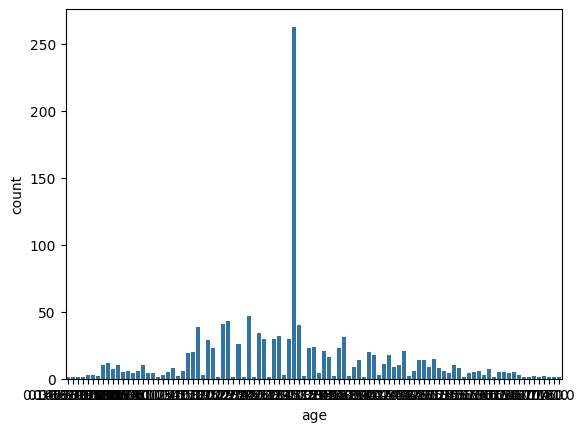

In [20]:
sns.countplot(x=a.columns[3],data=a)

<Axes: >

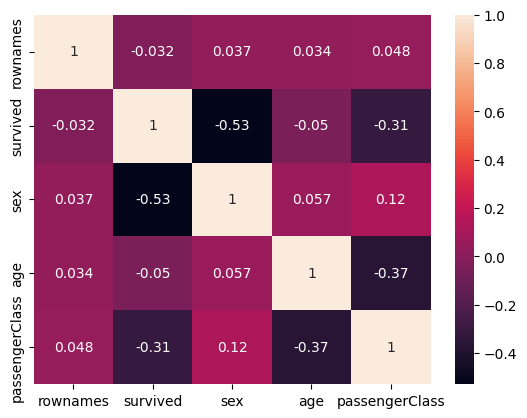

In [22]:
#data=a.select_dtypes(include=np.number).corr()
data=a.corr()

sns.heatmap(data, annot=True)

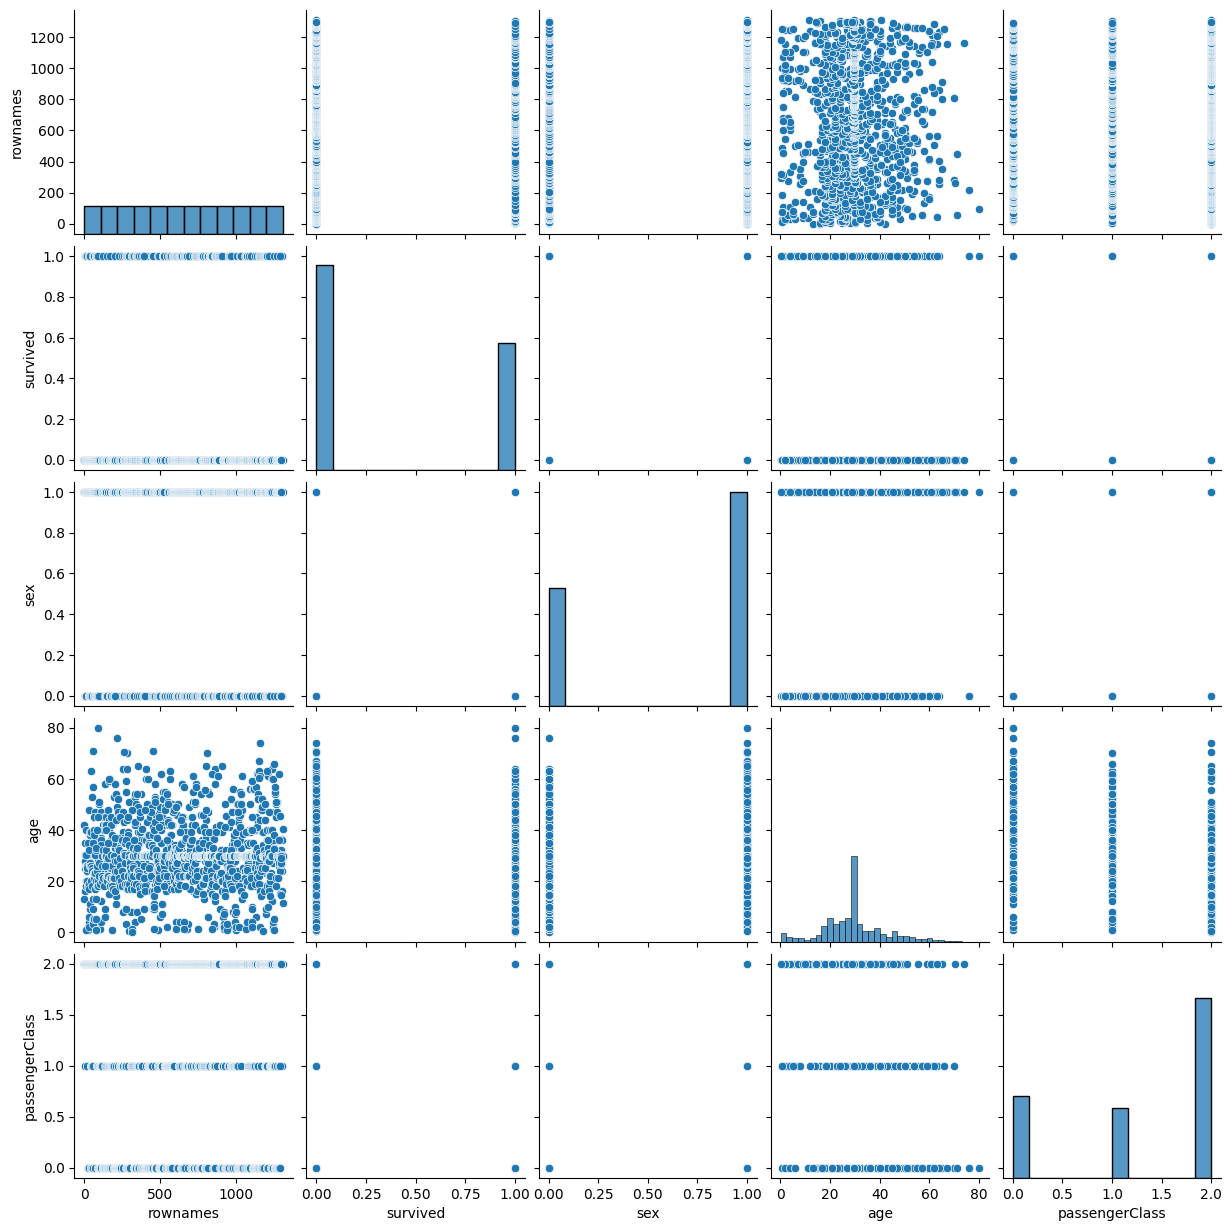

In [23]:
sns.pairplot(data=a)

In [24]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

      rownames  sex        age  passengerClass
0           21    0  29.000000               0
1           23    1   0.916700               0
2           24    0   2.000000               0
3           25    1  30.000000               0
4           26    0  25.000000               0
...        ...  ...        ...             ...
1304      1293    0  14.500000               2
1305      1294    0  29.881135               2
1306      1295    1  26.500000               2
1307      1296    1  27.000000               2
1308      1297    1  29.000000               2

[1309 rows x 4 columns]


In [25]:
print(y)

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [27]:
print(x_train)

      rownames  sex        age  passengerClass
849        491    1  26.000000               2
446        545    0  20.000000               1
857        521    1  27.000000               2
468        627    0  22.000000               1
1042       835    0  29.881135               2
...        ...  ...        ...             ...
213        857    0  31.000000               0
402        358    0  30.000000               1
732        271    1  30.000000               2
1257      1196    0   9.000000               2
288       1166    0  48.000000               0

[1047 rows x 4 columns]


In [28]:
print(y_train)

849     0
446     1
857     1
468     0
1042    1
       ..
213     1
402     1
732     0
1257    1
288     1
Name: survived, Length: 1047, dtype: int64


In [29]:
print(x_test)

      rownames  sex        age  passengerClass
928        647    0  29.881135               2
381        269    0  30.000000               1
1259      1202    1  36.000000               2
50         199    0  58.000000               0
504        794    1  39.000000               1
...        ...  ...        ...             ...
627         36    0   9.000000               2
343        112    1  34.000000               1
773        331    1  42.000000               2
527        927    1  28.000000               1
860        524    0  26.000000               2

[262 rows x 4 columns]


In [30]:
print(y_test)

928     0
381     0
1259    0
50      1
504     0
       ..
627     0
343     1
773     0
527     0
860     1
Name: survived, Length: 262, dtype: int64


In [31]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

In [32]:
print(ypred)

[1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1
 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1
 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0
 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1
 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0
 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 1]


In [33]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.7557251908396947


In [35]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[132  28]
 [ 36  66]]


In [37]:
print(model.predict([[647,0,29.881135,2]]))

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [38]:
from sklearn.tree import DecisionTreeClassifier
b=DecisionTreeClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [39]:
print(ypred)

[1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1
 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0
 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1
 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0
 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0
 0 0 0]


In [42]:
print(model.predict([[647,0,29.881135,2]]))

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [43]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.7099236641221374


In [44]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[125  35]
 [ 41  61]]


In [45]:
from sklearn.ensemble import RandomForestClassifier
b=RandomForestClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [46]:
print(ypred)

[1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1
 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0
 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0
 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0]


In [47]:
print(model.predict([[647,0,29.881135,2]]))

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [48]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.7900763358778626


In [49]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[139  21]
 [ 34  68]]


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       160
           1       0.76      0.67      0.71       102

    accuracy                           0.79       262
   macro avg       0.78      0.77      0.77       262
weighted avg       0.79      0.79      0.79       262

